## The Sparks Foundation : GRIP Intern - Task 1 - Prediction using Supervised ML 
- Predict the percentage of an student based on the no. of study hours.
- Problem Statement : 
    What will be predicted score if a student studies for 9.25 hrs/ day?

### Simple Linear Regression 
- In statistics, simple linear regression deal with only two variable, i.e one dependent variable and one independent variable.
- SLR is used to find a linear function that predicts the dependent variable values as a function of the independent variable.

### The following tasks involve few steps :
1. **[Reading the Data](#read)**
2. **[Plotting the Data](#plot)**
3. **[Preparing the Data](#prep)**
4. **[Training the Algorithm](#train)**
5. **[Making Prediction](#pred)**
6. **[Evaluation of the Model](#eval)**

#### Import the required libraries 

In [71]:
# Libraries for read and plotting the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for training the algorithm and predicting.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm

plt.style.use('seaborn-darkgrid')

<a id = "read"> </a>
## 1. Reading the Data

In [2]:
# Reading the data from url

data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- The dataset contains two variables.
- 'Hours' is the dependent variable and 'Scores' is the independent variable.

In [3]:
# Shape of the dataframe.

print('The shape of the data :',data.shape)

The shape of the data : (25, 2)


In [4]:
# Checking for null values.

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- There is no null values in the dataset.

<a id = "plot"> </a>
## 2. Plotting the Data

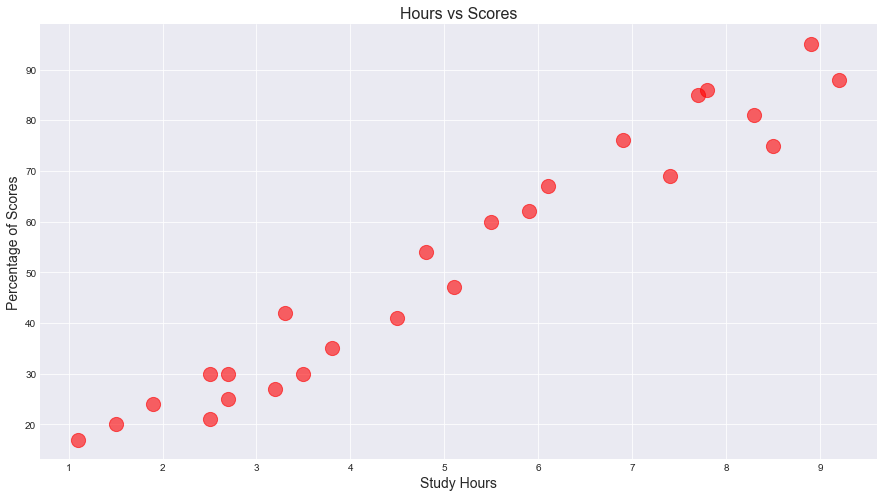

In [5]:
# We can plot the variable to find the relationship.

plt.figure(figsize=(15,8))
plt.scatter(data['Hours'], data['Scores'], color='red', alpha=0.6, s=200)
plt.title('Hours vs Scores',size=16)
plt.xlabel('Study Hours',size=14)
plt.ylabel('Percentage of Scores',size=14)
plt.show()

/Users/mohammedharrishmusthafa/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


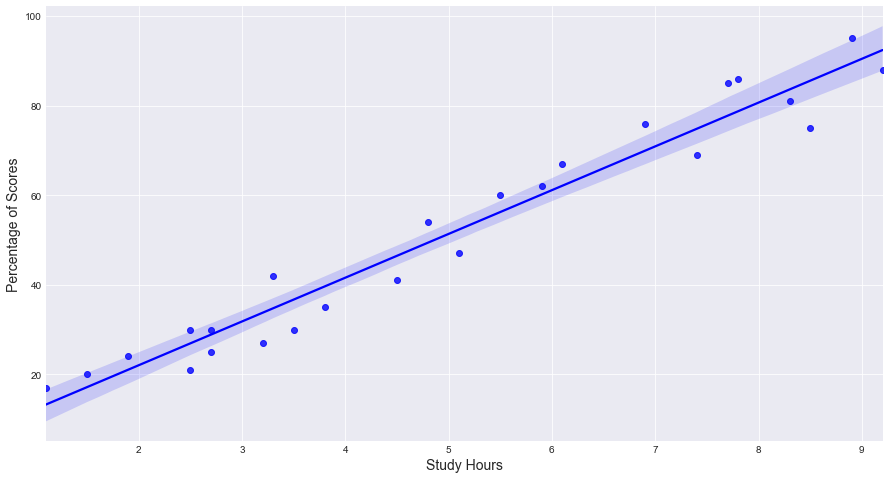

In [6]:
# Plotting the data using regression plot.

plt.figure(figsize=(15,8))
sns.regplot(data['Hours'], data['Scores'], color='blue')
plt.xlabel('Study Hours',size=14)
plt.ylabel('Percentage of Scores',size=14)
plt.show()

- The above two graphs clearly shows that there is a linear relationship between 'Hours' and 'Scores' column.

<a id = "prep"> </a>
## 3. Preparing the Data

- The preparation of data includes the spiliting the data into X (independent variable) and y (dependent variable).
- Further we have to divide the total dataset into train data and test data.

In [23]:
# Dividing the data into X(independent variable) and y(dependent variable)

X = data.drop('Scores', axis=1)
y = data['Scores']

In [24]:
# Dividing the data further into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

- Here we are dividing the dataset into 70% train data and 30% test data.

In [25]:
print('The shape of X_train and X_test : ',X_train.shape, X_test.shape)

The shape of X_train and X_test :  (17, 1) (8, 1)


In [26]:
print('The shape of y_train and y_test : ',y_train.shape, y_test.shape)

The shape of y_train and y_test :  (17,) (8,)


<a id = "train"> </a>
## 4. Training the Algorithm

- We have divided the dataset into train and test, we can use the train data for training the algorithm

In [27]:
# For training the algorithm, we use Linear regression.

lir_reg = LinearRegression()

# Fit the train data in the algorithm

lir_reg.fit(X_train,y_train)

LinearRegression()

- As we know simple regression line can be expressed as y = mX + c. Where,
    - y - Dependent variable
    - m - Slope
    - X - Independent variable
    - c - Constant/ Y-intercept

### Plotting the regression line in the given dataset

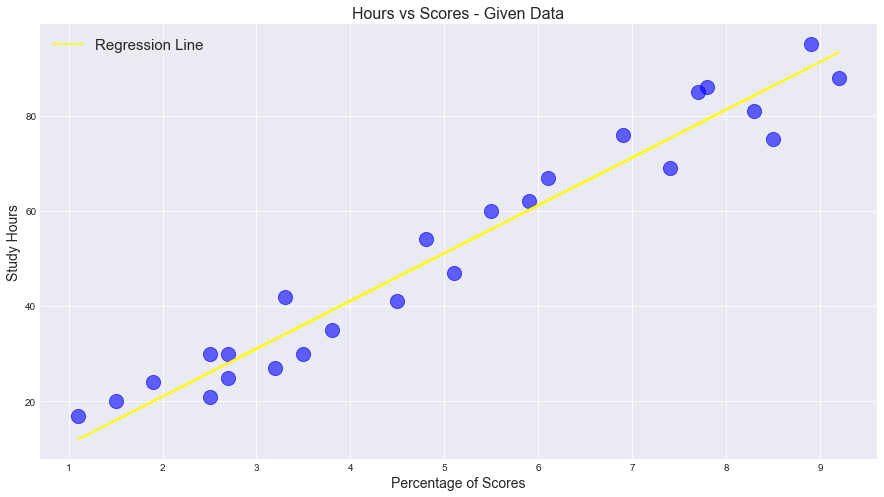

In [31]:
# By using the above expression, we can plot get the regression line.

reg_line = lir_reg.coef_*X + lir_reg.intercept_

plt.figure(figsize=(15,8))
plt.scatter(X, y, color='blue', alpha=0.6, s=200,)
plt.plot(X, reg_line, color='yellow', label = 'Regression Line')
plt.title('Hours vs Scores - Given Data', size=16)
plt.xlabel('Percentage of Scores', size=14)
plt.ylabel('Study Hours', size=14)
plt.legend(fontsize=15)
plt.show()

### Plotting the regression line in the train dataset

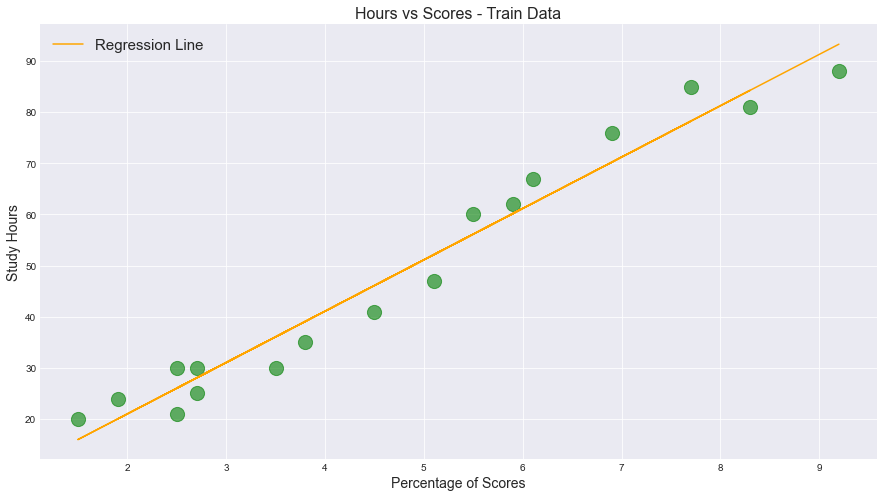

In [32]:
# We get the y train predicted values using the predcit attribute available with the library.

y_train_pred = lir_reg.predict(X_train)

# We can fit the regression line in the train dataset.

plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train, color='g', alpha=0.6, s=200,)
plt.plot(X_train, y_train_pred, color='orange', label = 'Regression Line')
plt.title('Hours vs Scores - Train Data', size=16)
plt.xlabel('Percentage of Scores', size=14)
plt.ylabel('Study Hours', size=14)
plt.legend(fontsize=15)
plt.show()

### Plotting the regression line in the test dataset

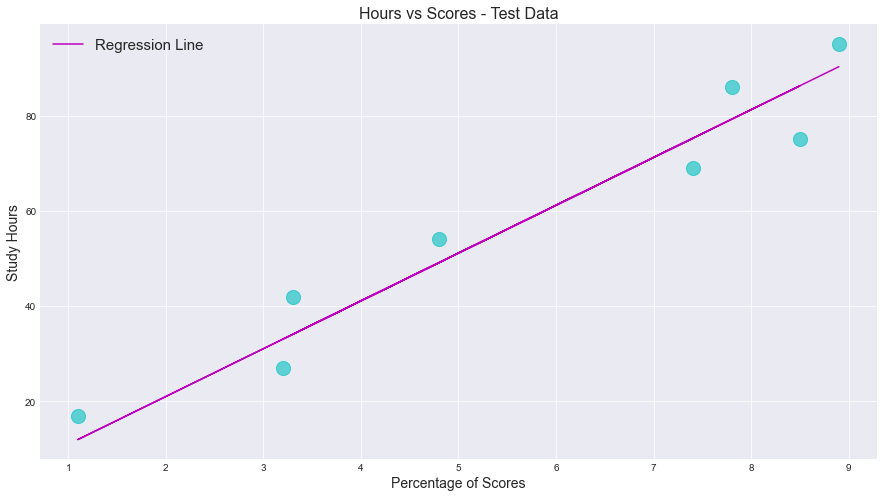

In [33]:
# We get the y test predicted values using the predcit attribute available with the library.

y_test_pred = lir_reg.predict(X_test)

# We can fit the regression line in the test dataset.

plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test, color='c', alpha=0.6, s=200,)
plt.plot(X_test, y_test_pred, color='m', label = 'Regression Line')
plt.title('Hours vs Scores - Test Data', size=16)
plt.xlabel('Percentage of Scores', size=14)
plt.ylabel('Study Hours', size=14)
plt.legend(fontsize=15)
plt.show()

<a id = "pred"> </a>
## 5. Making Prediction

In [58]:
# To predict the scores

y_test_pred = lir_reg.predict(X_test)

In [59]:
# Create a dataframe with the actual test data and predicted test data

pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred_df.head()

,Actual,Predicted
15,95,90.279155
24,86,79.236617
14,17,11.977522
19,69,75.221148
13,42,34.062598


In [60]:
# As we know the problem statement is to predict the score, if a student studies for 9.25 hrs/ day.

hours = [[9.25]]

my_pred = lir_reg.predict(hours)
print('The predicted score is',round(my_pred[0],2), 'if a student studies for 9.25 hrs/day')

The predicted score is 93.79 if a student studies for 9.25 hrs/day


<a id = "eval"> </a>
## 6. Evaluation of the Model

### We can evaluate the model using different metrices

In [67]:
# Evaluating the model using Mean Squared Error.

print('The Mean Squared Error value of the train model is :',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('The Mean Squared Error value of the test model is :',np.sqrt(mean_squared_error(y_test,y_test_pred)))

The Mean Squared Error value of the train model is : 4.547987129297925
The Mean Squared Error value of the test model is : 6.913278963878004


In [68]:
# Evaluating the model using Mean Absolute Error.

print('The Mean Absolute Error value of the train model is :',mean_absolute_error(y_train,y_train_pred))
print('The Mean Absolute Error value of the test model is :',mean_absolute_error(y_test,y_test_pred))

The Mean Absolute Error value of the train model is : 4.354263401870492
The Mean Absolute Error value of the test model is : 6.608383730582239


In [74]:
# Evaluating the model using R2 Score.

print('The R2 score of the train model is :',r2_score(y_train, y_train_pred))
print('The R2 score of the test model is :',r2_score(y_test, y_test_pred))

The R2 score of the train model is : 0.9623919141966742
The R2 score of the test model is : 0.930188764896189


- Since the R2 score of both the model is close to 1, it is considered as robust model.

## Summary :

- We have read the dataset from the url provided.
- Then we have plotted the given dataset to get a idea about the distribution of the data.
- Further, we divided the data into X and y variables and divided into train and test data.
- Then we used train data to train the algorithm. In our case we used Linear Regression algorithm.
- We visualized the regression line in different datasets.
- With the help of 'predict' attribute, we made prediction of sores with the test data.
- The result for out problem statement is : The predicted score is 93.79 if a student studies for 9.25 hrs/day
- Finally we have completed our task with evaluation the model by mean squared errors, mean absolute errors and R2 scores.